In [1]:
import requests

In [2]:
url = 'https://www.pagina12.com.ar/'

In [3]:
p12 = requests.get(url)

In [4]:
p12.status_code

200

In [5]:
p12.text

deos/peliculas/memoria-iuminada-maria-elena-walsh/" target="_blank" ">María Elena <span class="title-separator">Walsh</span> <span class="title-prefix">Un documental de Virna Molina y Ernesto Ardito</span></a></a></div><div class="time-author-wrapper article-ta "></div></div></div></article></div></div><div class="columns small-12 medium-4 index-1"> <div class="headline-card headline-1 "><article class="headline-card-inner"><div class="block-multimedia"><div class="multimedia-container"><a href="https://octubretv.com/videos/peliculas/tremendo-amanecer/" target="_blank"><div class="intrinsic-container"><img class="show-for-small-only  lazyload" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=2.0.8" data-src="https://images.pagina12.com.ar/styles/focal_16_9_470x264/public/rest_images/tremendo-amanecer.jpg?itok=tsm_Ej18" alt=""><img class="show-for-medium-only  lazyload" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=2.0.8" data-src="https://

In [6]:
p12.content

span> <span class="title-prefix">Un documental de Virna Molina y Ernesto Ardito</span></a></a></div><div class="time-author-wrapper article-ta "></div></div></div></article></div></div><div class="columns small-12 medium-4 index-1"> <div class="headline-card headline-1 "><article class="headline-card-inner"><div class="block-multimedia"><div class="multimedia-container"><a href="https://octubretv.com/videos/peliculas/tremendo-amanecer/" target="_blank"><div class="intrinsic-container"><img class="show-for-small-only  lazyload" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=2.0.8" data-src="https://images.pagina12.com.ar/styles/focal_16_9_470x264/public/rest_images/tremendo-amanecer.jpg?itok=tsm_Ej18" alt=""><img class="show-for-medium-only  lazyload" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=2.0.8" data-src="https://images.pagina12.com.ar/styles/focal_16_9_960x540/public/rest_images/tremendo-amanecer.jpg?itok=ZhXT0Qa1" alt=""><img cl

In [7]:
p12.headers

{'Date': 'Fri, 11 Jun 2021 20:40:42 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'X-DNS-Prefetch-Control': 'off', 'Strict-Transport-Security': 'max-age=15724800; includeSubDomains', 'X-Download-Options': 'noopen', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'X-ETag': 'W/"68b44-YplRv3lsYbqpF5FQEYI4fYihhcY"', 'X-Backend': 'frontend', 'X-Backend-TTL': '180.000', 'X-Type': 'Dynamic URI', 'Age': '0', 'grace': '86400.000 none', 'ttl': '119.802', 'X-Instance': 'cache-front-prod-varnish-68cf7d4bd6-krwmr', 'x-restarts': '0', 'X-Cache': 'HIT (4)', 'CF-Cache-Status': 'DYNAMIC', 'cf-request-id': '0a9e674a2f0000ff94a5812000000001', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '65dda7f04882ff94-BOS', 'Content-Encoding': 'gzip'}

In [8]:
p12.request.headers

{'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
p12.request.method

'GET'

In [10]:
 p12.request.url

'https://www.pagina12.com.ar/'

In [11]:
!pip install lxml beautifulsoup4 

In [12]:
from bs4 import BeautifulSoup

In [13]:
s = BeautifulSoup(p12.text, 'lxml')

In [14]:
sections = s.find('ul', attrs={'class': 'horizontal-list main-sections hide-on-dropdown'}).find_all('li')

In [31]:
#Error: The object is a list
sections.find('a')

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [29]:
sections[0].find('a')

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [30]:
sections[0].a

<a href="https://www.pagina12.com.ar/secciones/el-pais">El país</a>

In [32]:
sections[0].a.get_text()

'El país'

In [15]:
section = sections[0]

In [16]:
section_url = section.a.get('href')

In [17]:
section_page = requests.get(section_url)

In [18]:
s_section = BeautifulSoup(section_page.text, 'lxml')

In [19]:
def build_soup(url):
    response = requests.get(url)
    return BeautifulSoup(response.text, 'lxml')

In [20]:
def get_article_links(soup):
    articles = soup.find_all(attrs={'class': 'title-list'})
    return [article.a.get('href') for article in articles]

In [21]:
get_article_links(s_section)

['/347636-el-gobierno-autorizo-el-uso-de-emergencia-de-la-vacuna-del-l',
 '/347632-nuevo-record-del-plan-de-vacunacion-se-aplicaron-mas-de-376-',
 '/347625-llevaron-a-declarar-esposada-a-milagro-sala-por-una-nueva-ca',
 '/347616-kicillof-anuncio-la-vuelta-a-la-presencialidad-escolar-cuida',
 '/347610-una-conadep-indigena',
 '/347598-nuevas-medidas-contra-el-coronavirus-que-decia-el-dnu-287-qu',
 '/347593-gisela-marziotta-sobre-la-sancion-de-la-ley-de-equidad-de-ge',
 '/347592-vacuna-oxford-astra-zeneca-ya-se-produjeron-en-la-argentina-',
 '/347591-argentina-podria-acceder-a-mas-de-un-millon-de-vacunas-de-es',
 '/347589-alberto-fernandez-reinaguro-un-centro-de-avanzada-para-el-tr',
 '/347586-restricciones-alberto-fernandez-confirmo-la-continuidad-del-']

In [22]:
section_links = [section.a.get('href') for section in sections]

In [33]:
try:
    s_section = build_soup(section_links[0])
    article_links = get_article_links(s_section)
except Exception as e:
    print(e)

In [35]:
s_article = build_soup(url + article_links[0])

In [61]:
title = s_article.find('div', attrs={'class': 'article-header'}).h1.get_text()
title

'Los seis encuentros con Macri que Hornos le ocultó a la Cámara de Casación\xa0'

In [63]:
date = s_article.find('span', attrs={'pubdate': 'pubdate'}).get('datetime')
date

'2021-06-11'

In [64]:
#Volanta
headlines = s_article.find('div', attrs={'class': 'article-header'}).h4.get_text()
headlines

'El máximo tribunal penal ratificó que el juez nunca informó de sus reuniones con el expresidente'

In [66]:

intro = s_article.find('div', attrs={'class': 'article-header'}).h3.get_text()
intro

'A pedido del juez Marcelo Martínez de Giorgi, que\xa0investiga la presunta influencia indebida del expresidente sobre el juez Gustavo Hornos,\xa0el vicepresidente de Casación, Alejandro Slokar, precisó que el titular de la Cámara nunca dio a conocer las reuniones que mantuvo en Casa Rosada.'

In [70]:
author = s_article.find('div', attrs={'author-name'}).get_text().replace('Por ', '')
author

'Luciana Bertoia'

In [79]:
body_paragraph_list = s_article.find('div', attrs={'class': 'article-text'}).find_all('p')

In [81]:
body = ' '.join([p.get_text() for p in body_paragraph_list])

'Gustavo Hornos jamás informó en la Cámara Federal de Casación que mantuvo al menos seis encuentros con Mauricio Macri en la Casa Rosada entre diciembre de 2015 y agosto de 2018. Así surge de la respuesta que envió\xa0el vicepresidente del máximo tribunal penal, Alejandro Slokar, al juez Marcelo Martínez de Giorgi, que --junto con la fiscal Alejandra Mángano-- investiga si los encuentros fueron ocasión para que el entonces presidente ejerciera una influencia indebida sobre el camarista que tenía en sus manos casos de alta sensibilidad política contra Cristina Fernández de Kirchner y exfuncionarios de su gobierno. La semana empezó turbulenta en Casación después de que se conociera que Martínez de Giorgi había hecho lugar a los pedidos de la fiscal para investigar al presidente del máximo tribunal penal del país y terminó aun más convulsionada después de que Slokar remitiera toda la documentación que le habían solicitado a él en tanto vicepresidente del cuerpo, ya que Hornos no puede int

In [89]:
images = s_article.find('div', attrs={'class': 'article-main-media-image__container'}).find_all('img')
images

[<img alt="" class="lazyload" data-src="https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-06/169484-hornos_0.jpg?itok=V8g2dJ9D" src="https://www.pagina12.com.ar/assets/media/assets/transparent.gif?v=2.0.8"/>]

In [91]:
image_url = images[-1].get('data-src')
image_url

'https://images.pagina12.com.ar/styles/focal_3_2_960x640/public/2021-06/169484-hornos_0.jpg?itok=V8g2dJ9D'

In [92]:
image_req = requests.get(image_url)

In [96]:
image = image_req.content

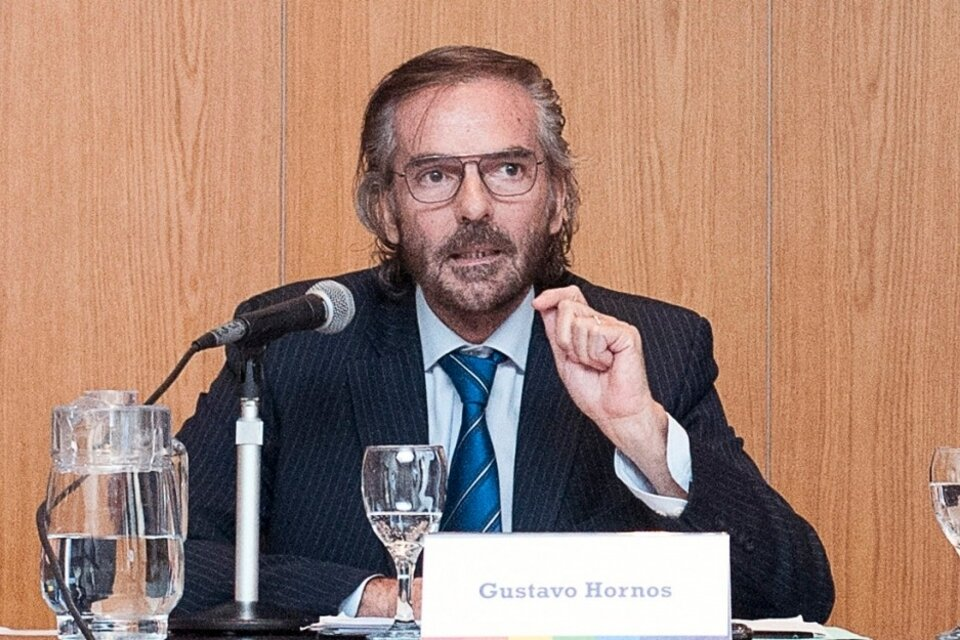

In [99]:
from IPython.display import Image
Image(image)